# Intro.

This dataset is designed for developing predictive maintenance models for industrial equipment. It includes real-time sensor data capturing key operational parameters such as temperature, vibration, pressure, and RPM. The goal is to predict whether maintenance is required based on these metrics. The data can be used for anomaly detection, predictive maintenance modeling, and time series analysis.

Columns:

`Timestamp`: The date and time when the data was recorded.

`Temperature (°C)`: Temperature of the equipment in degrees Celsius.

`Vibration (mm/s)`: Vibration level measured in millimeters per second.

`Pressure (Pa)`: Pressure applied to the equipment in Pascals.

`RPM`: Rotations per minute of the equipment.

`Maintenance Required`: A binary indicator (Yes/No) showing whether maintenance is needed, based on predictive modeling.

Usage: 

This dataset is ideal for machine learning enthusiasts and professionals interested in predictive maintenance and industrial IoT applications.

# Data overview

lets look at the data we are dealing with

In [5]:
import pandas as pd

In [9]:
data_raw = pd.read_csv('./data/industrial/raw/equipment_data.csv')
data_processed_features = pd.read_csv('./data/industrial/processed/processed_data_with_features.csv')
data_processed = pd.read_csv('./data/industrial/processed/processed_data.csv')

In [11]:
data_raw.head()

Timestamp  Temperature (°C)  Vibration (mm/s)  Pressure (Pa)  \
0  2019-01-01 00:00:00          0.548793          0.509840       0.619918   
1  2019-01-01 01:00:00          0.715185          0.587573       0.802121   
2  2019-01-01 02:00:00          0.602748          0.294453       0.965546   
3  2019-01-01 03:00:00          0.544862          0.500041       0.519955   
4  2019-01-01 04:00:00          0.423622          0.031649       0.323663   

        RPM  Maintenance Required  Temp_Change  Vib_Change  
0  0.741161                     1     0.501129    0.499619  
1  0.292862                     1     0.584882    0.538630  
2  0.624416                     1     0.444534    0.352514  
3  0.931955                     0     0.471992    0.602794  
4  0.799867                     0     0.440103    0.264552

In [15]:
data_processed.head()

Timestamp  Temperature (°C)  Vibration (mm/s)  Pressure (Pa)  \
0  2019-01-01 00:00:00          0.176283          0.033611       0.404079   
1  2019-01-01 01:00:00          0.750960          0.302949       1.033265   
2  2019-01-01 02:00:00          0.362631         -0.712681       1.597605   
3  2019-01-01 03:00:00          0.162707         -0.000341       0.058888   
4  2019-01-01 04:00:00         -0.256026         -1.623271      -0.618951   

        RPM  Maintenance Required  Temp_Change  Vib_Change  
0  0.832177                     1    -0.000021   -0.000016  
1 -0.719691                     1     0.406404    0.190254  
2  0.428044                     1    -0.274656   -0.717490  
3  1.492644                     0    -0.141411    0.503204  
4  1.035398                     0    -0.296158   -1.146507

In [18]:
# data_process is the data with normalized features (looks like)

In [20]:
data_processed_features.head()

Timestamp  Temperature (°C)  Vibration (mm/s)  Pressure (Pa)  \
0  2019-01-01 00:00:00          0.176283          0.033611       0.404079   
1  2019-01-01 01:00:00          0.750960          0.302949       1.033265   
2  2019-01-01 02:00:00          0.362631         -0.712681       1.597605   
3  2019-01-01 03:00:00          0.162707         -0.000341       0.058888   
4  2019-01-01 04:00:00         -0.256026         -1.623271      -0.618951   

        RPM  Maintenance Required  Temp_Change  Vib_Change  Temperature_Mean  \
0  0.832177                     1    -0.000021   -0.000016               NaN   
1 -0.719691                     1     0.406404    0.190254               NaN   
2  0.428044                     1    -0.274656   -0.717490               NaN   
3  1.492644                     0    -0.141411    0.503204               NaN   
4  1.035398                     0    -0.296158   -1.146507          0.239311   

   Vibration_Mean  Pressure_Mean  RPM_Mean  
0             NaN            NaN       NaN  
1             NaN            NaN       NaN  
2             NaN            NaN       NaN  
3             NaN            NaN       NaN  
4       -0.399947       0.494977  0.613714

In [22]:
# new columns with avareage values for each of the feature. How was this avareging done? I won't use it,
# for a reason that I don't know the deatails of the data treatment performed before

In [24]:
# lets take the raw data

In [26]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             43800 non-null  object 
 1   Temperature (°C)      43800 non-null  float64
 2   Vibration (mm/s)      43800 non-null  float64
 3   Pressure (Pa)         43800 non-null  float64
 4   RPM                   43800 non-null  float64
 5   Maintenance Required  43800 non-null  int64  
 6   Temp_Change           43800 non-null  float64
 7   Vib_Change            43800 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.7+ MB


In [37]:
data_raw.isna().sum()

Timestamp               0
Temperature (°C)        0
Vibration (mm/s)        0
Pressure (Pa)           0
RPM                     0
Maintenance Required    0
Temp_Change             0
Vib_Change              0
dtype: int64

In [41]:
# no nan values so no cleaning is needed

In [39]:
data = data_raw

In [32]:
# lets visualise some

# EDA

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(data,bins=35):
    numerical_columns = data.select_dtypes(include=['number']).columns

    num_cols = len(numerical_columns)
    num_rows = (num_cols + 2) // 3
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(numerical_columns):
        sns.histplot(data[column], bins=bins, kde=False, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

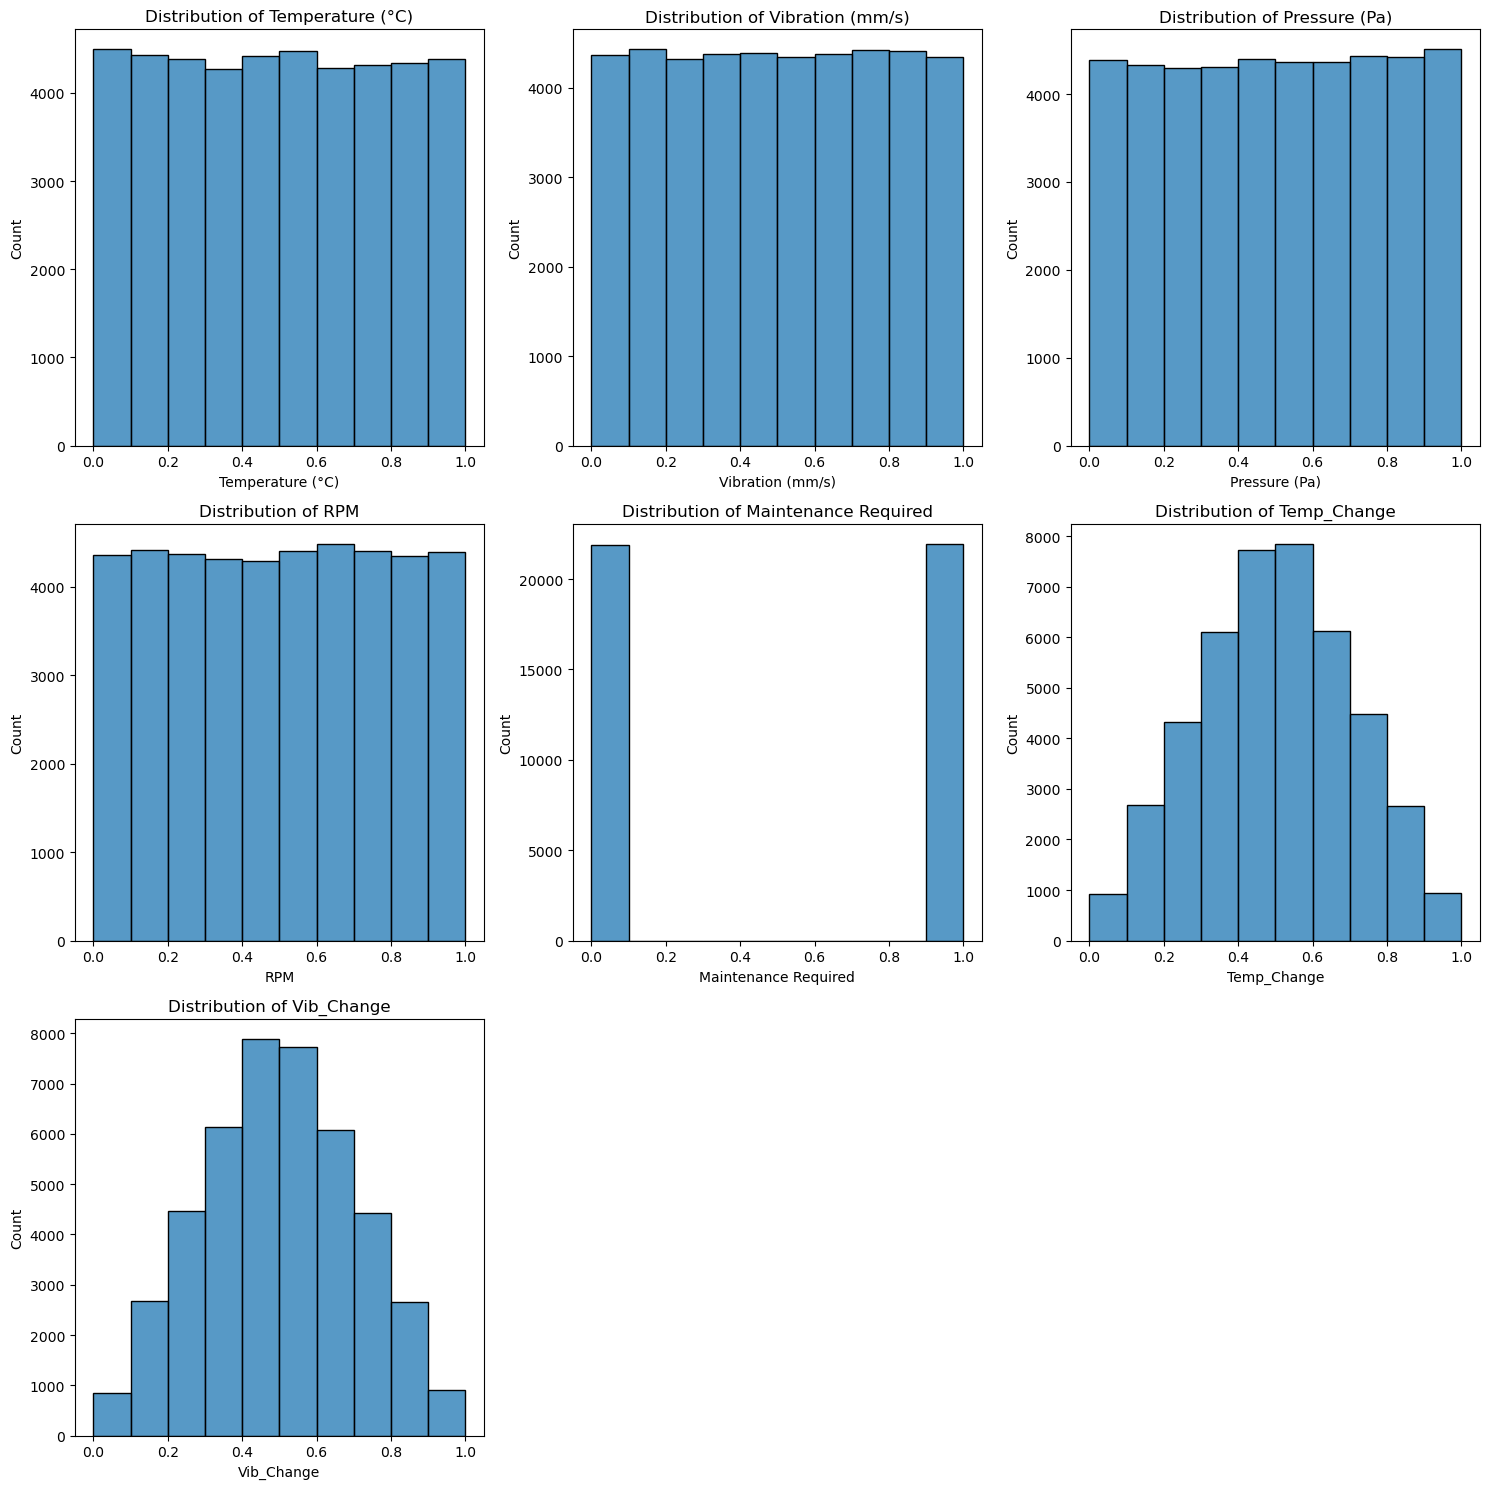

In [59]:
plot_histograms(data,10)

In [63]:
# I can say for sure that there is no disbalance in 'maintance required' column,
# we have a nice 50/50 distribution for two classes
# data looks lit it is been normalised, since all values are within interval (0,1)

In [67]:
# lets have a look at a pairplot to see any correlations and then at the correlation matrix

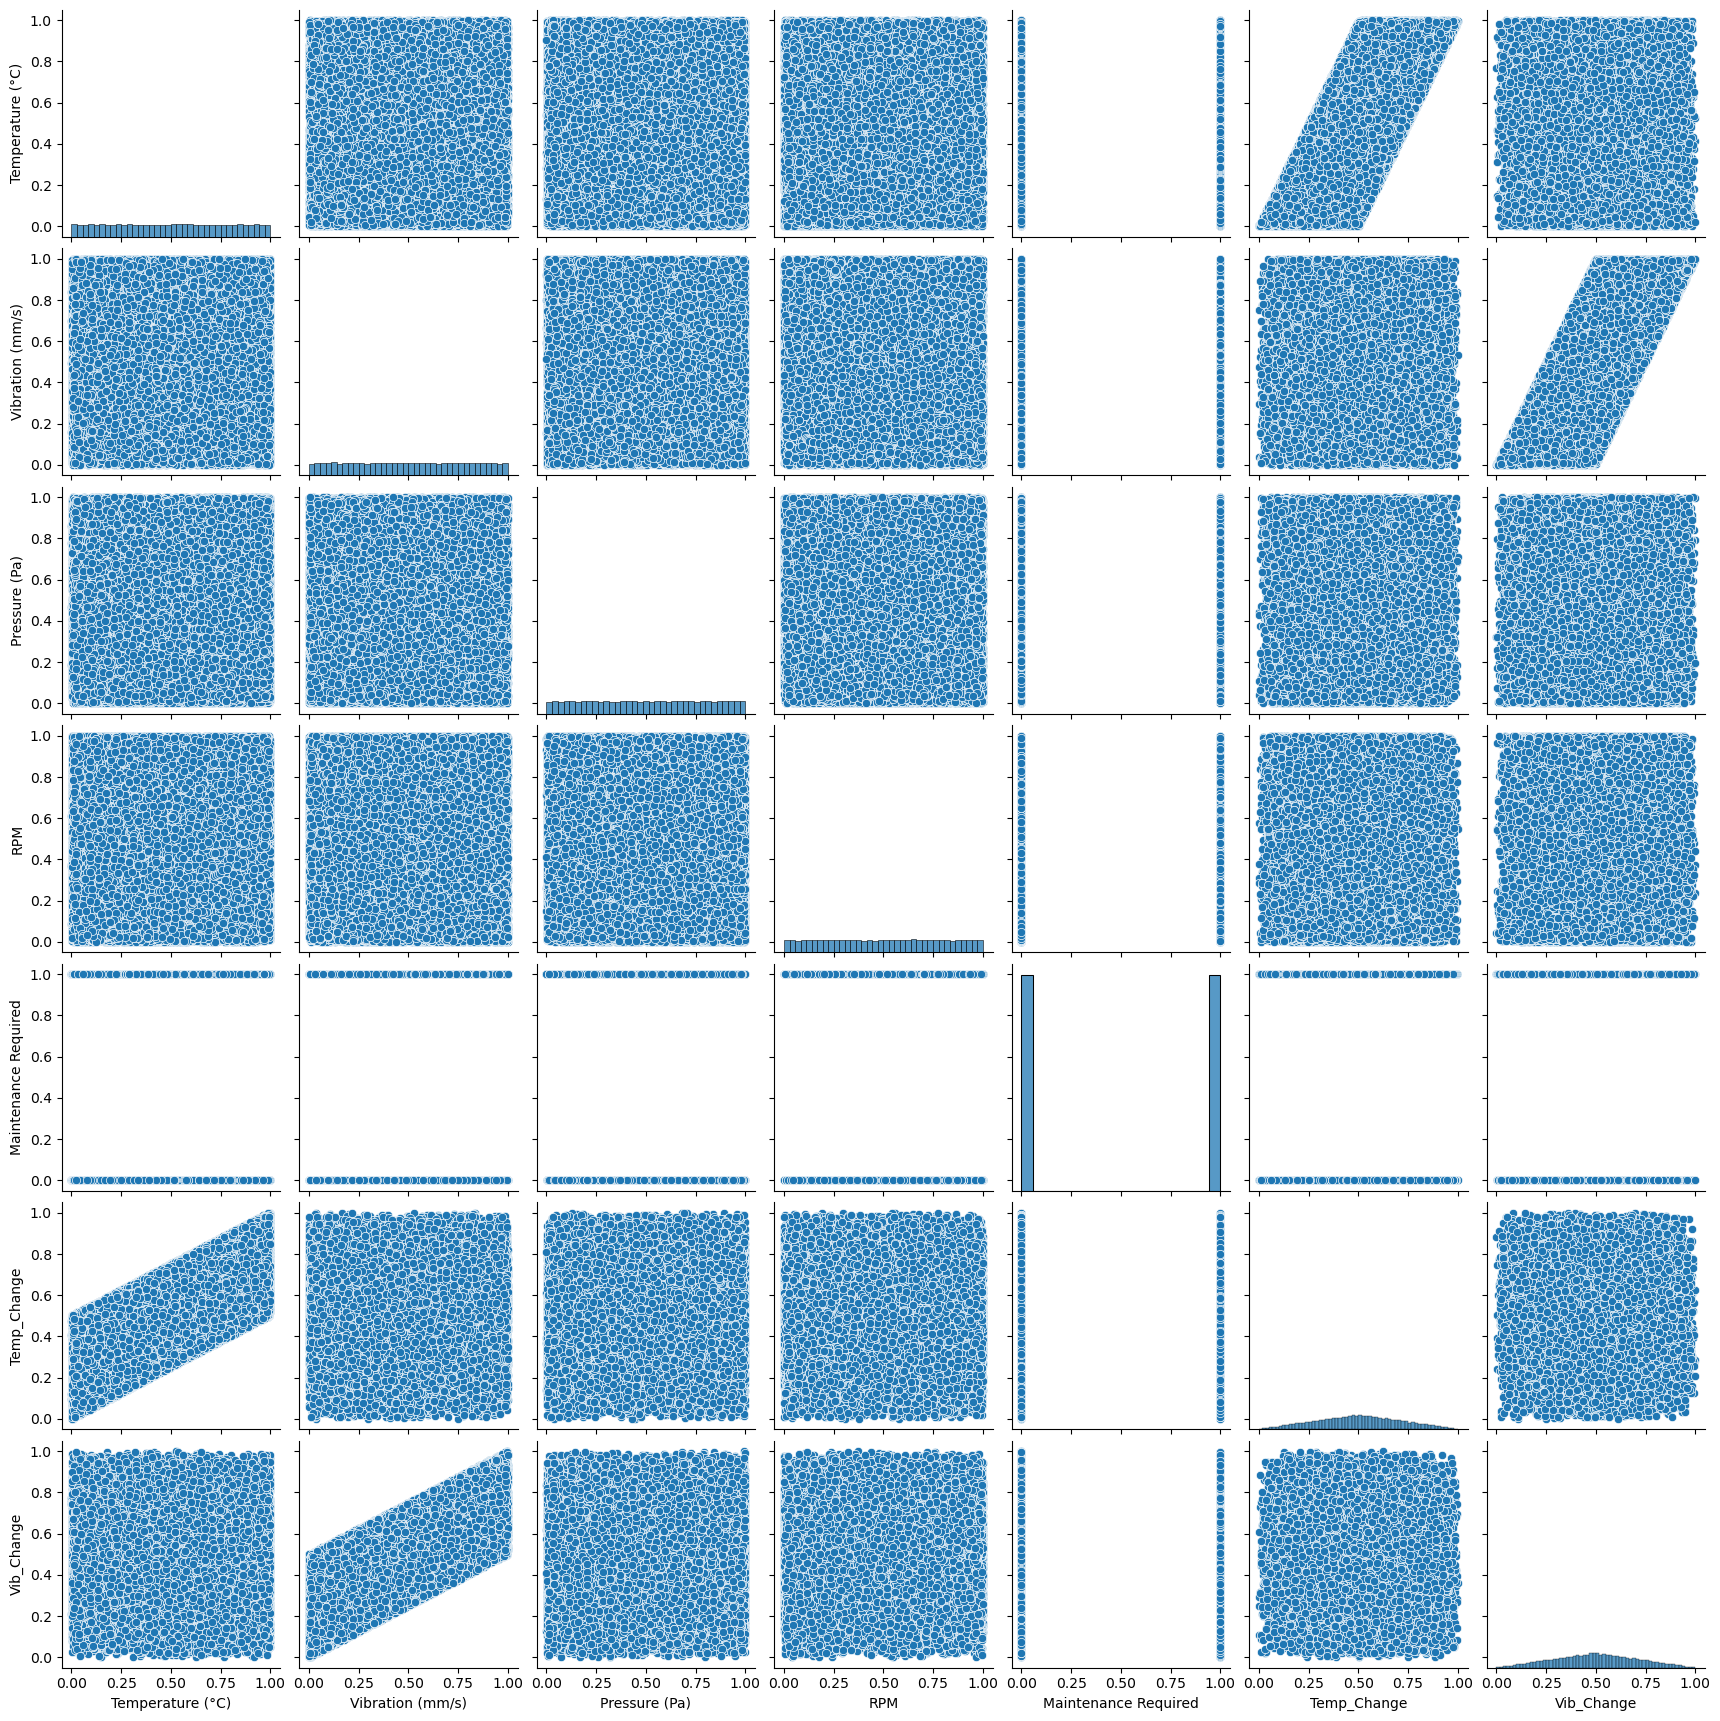

In [69]:
sns.pairplot(data)
plt.show()

In [73]:
# no evidence of linear correlations so far except for obvious temp and temp change, vibration and vibration change

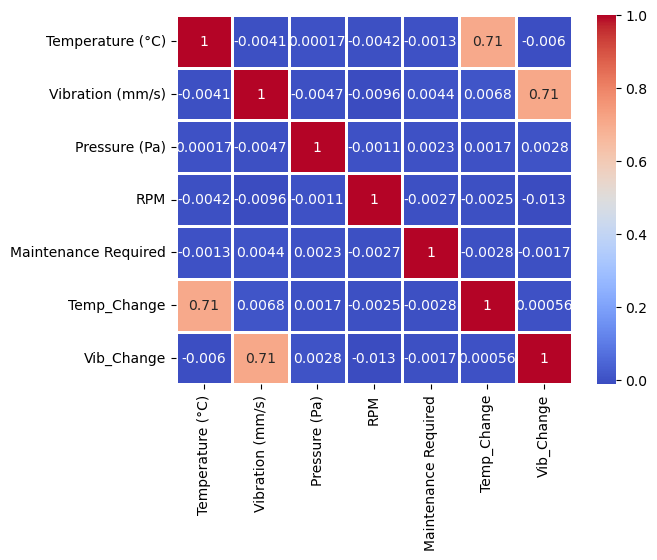

In [79]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot=True,linewidth=1,cmap='coolwarm')
plt.show()

In [81]:
# as it was shown by pairplot

In [83]:
# I guess we could see more once we start work with time

In [94]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [96]:
data['Timestamp'].duplicated().sum()

0

In [100]:
# lets set time as an index and look at the features development with time

In [106]:
data_index = data.set_index('Timestamp')

In [110]:
# daily changes:

In [151]:
daily = data_index.resample('D').mean()
monthly = data_index.resample('M').mean()

In [155]:
def plot_daily_monthly_trends(data):
    # Ensure the index is datetime for resampling
    if not pd.api.types.is_datetime64_any_dtype(data.index):
        raise ValueError("The index of the DataFrame must be datetime-like for resampling.")
    
    monthly_data = data.resample('M').mean()
    daily_data = data.resample('D').mean()

    numerical_columns = data.select_dtypes(include=['number']).columns

    num_cols = len(numerical_columns)
    num_rows = (num_cols + 2) // 3  # 3 plots per row

    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(numerical_columns):
        sns.lineplot(x=daily_data.index, y=daily_data[column], alpha=0.3, ax=axes[i], label='Daily Avg')
        sns.lineplot(x=monthly_data.index, y=monthly_data[column], ax=axes[i], label='Monthly Avg')
        axes[i].set_title(f'Trend of {column}')
        axes[i].legend()

    # Remove unused subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

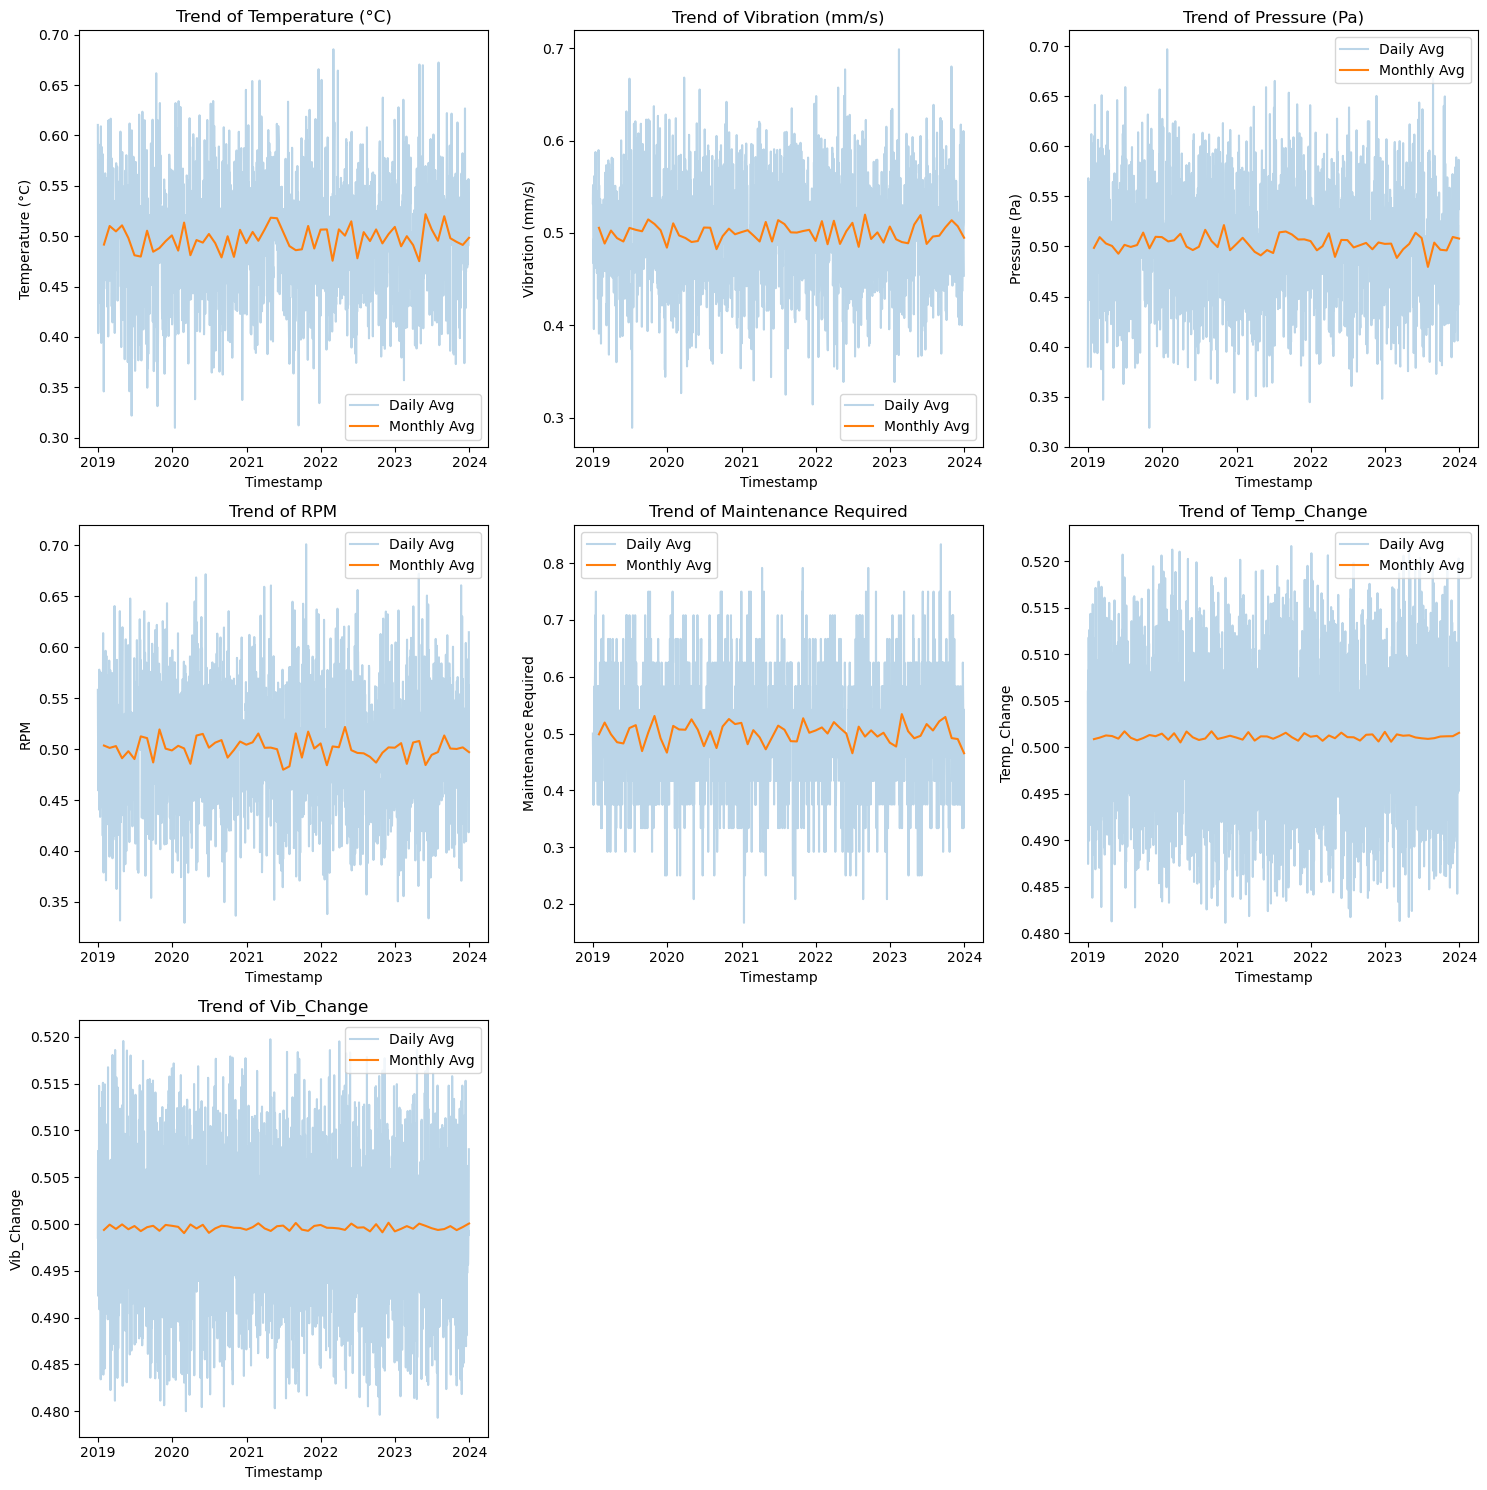

In [157]:
plot_daily_monthly_trends(data_index)

In [159]:
# I don't see anythinig obviously interesting here

# Data preprocessing 

In [86]:
# lets create time features

In [168]:
def extract_time_features(data):
    data['hour'] = data.index.hour
    data['day'] = data.index.day
    data['weekday'] = data.index.weekday
    data['month'] = data.index.month
    data['year'] = data.index.year
    return data

In [170]:
data_final = extract_time_features(data_index)

In [174]:
data_final.head()

Temperature (°C)  Vibration (mm/s)  Pressure (Pa)  \
Timestamp                                                                
2019-01-01 00:00:00          0.548793          0.509840       0.619918   
2019-01-01 01:00:00          0.715185          0.587573       0.802121   
2019-01-01 02:00:00          0.602748          0.294453       0.965546   
2019-01-01 03:00:00          0.544862          0.500041       0.519955   
2019-01-01 04:00:00          0.423622          0.031649       0.323663   

                          RPM  Maintenance Required  Temp_Change  Vib_Change  \
Timestamp                                                                      
2019-01-01 00:00:00  0.741161                     1     0.501129    0.499619   
2019-01-01 01:00:00  0.292862                     1     0.584882    0.538630   
2019-01-01 02:00:00  0.624416                     1     0.444534    0.352514   
2019-01-01 03:00:00  0.931955                     0     0.471992    0.602794   
2019-01-01 04:00:00  0.799867                     0     0.440103    0.264552   

                     hour  day  weekday  month  year  
Timestamp                                             
2019-01-01 00:00:00     0    1        1      1  2019  
2019-01-01 01:00:00     1    1        1      1  2019  
2019-01-01 02:00:00     2    1        1      1  2019  
2019-01-01 03:00:00     3    1        1      1  2019  
2019-01-01 04:00:00     4    1        1      1  2019

In [176]:
# lets do more preprocessing and do onehotencoder for the time features
# but first separate target from features

In [184]:
X = data_final.copy() # our features
y = X.pop('Maintenance Required') # target

In [186]:
print(X.shape,'||',y.shape) # just to be sure that the size is still the same

(43800, 11) || (43800,)


In [191]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

timefeatures = ['hour','day','weekday','month','year']

preprocesser = ColumnTransformer([
    ('time_features', OneHotEncoder(), timefeatures)
],
    remainder='passthrough'
)

In [195]:
# lets do splitting into train and test

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=101)

# Model

## Decision tree model

In [205]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('preprocesser', preprocesser),
    ('classifier', DecisionTreeClassifier())
])

In [207]:
pipeline.set_params(classifier=DecisionTreeClassifier())

Pipeline(steps=[('preprocesser',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('time_features',
                                                  OneHotEncoder(),
                                                  ['hour', 'day', 'weekday',
                                                   'month', 'year'])])),
                ('classifier', DecisionTreeClassifier())])

In [227]:
# lets add some crossvalidation
# plus I want to keep result for each model in one table

In [225]:
from sklearn.model_selection import cross_validate
import numpy as np

metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

def calculate_classification_metrics(model, X, y):
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    results = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False)
    

    accuracy = results['test_accuracy'].mean()
    precision = results['test_precision_macro'].mean()
    recall = results['test_recall_macro'].mean()
    f1 = results['test_f1_macro'].mean()

    return accuracy, precision, recall, f1

In [229]:
accuracy, precision, recall, f1 = calculate_classification_metrics(pipeline,X_train,y_train)
metrics_df = pd.concat([metrics_df, pd.DataFrame({'Model': ['Decision Tree'], 'Accuracy': [accuracy], 
                                                  'Precision': [precision], 'Recall': [recall], 
                                                  'F1-score': [f1]})], ignore_index=True)

In [233]:
# lets do RandomForest

In [235]:
from sklearn.ensemble import RandomForestClassifier

pipeline.set_params(classifier = RandomForestClassifier(random_state=101))

Pipeline(steps=[('preprocesser',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('time_features',
                                                  OneHotEncoder(),
                                                  ['hour', 'day', 'weekday',
                                                   'month', 'year'])])),
                ('classifier', RandomForestClassifier(random_state=101))])

In [239]:
accuracy, precision, recall, f1 = calculate_classification_metrics(pipeline,X_train,y_train)
metrics_df = pd.concat([metrics_df, pd.DataFrame({'Model': ['Random Forest'], 'Accuracy': [accuracy], 
                                                  'Precision': [precision], 'Recall': [recall], 
                                                  'F1-score': [f1]})], ignore_index=True)

In [241]:
metrics_df

Model  Accuracy Precision    Recall  F1-score
0  Decision Tree  0.499515  0.499517  0.499517  0.499506
1  Random Forest  0.498145  0.498157  0.498165  0.497711

In [248]:
# logic regression

In [250]:
from sklearn.linear_model import LogisticRegression

pipeline.set_params(classifier=LogisticRegression())

Pipeline(steps=[('preprocesser',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('time_features',
                                                  OneHotEncoder(),
                                                  ['hour', 'day', 'weekday',
                                                   'month', 'year'])])),
                ('classifier', LogisticRegression())])

In [252]:
accuracy, precision, recall, f1 = calculate_classification_metrics(pipeline,X_train,y_train)
metrics_df = pd.concat([metrics_df, pd.DataFrame({'Model': ['Logic Regression'], 'Accuracy': [accuracy], 
                                                  'Precision': [precision], 'Recall': [recall], 
                                                  'F1-score': [f1]})], ignore_index=True)

In [257]:
# K nearest neighbors

In [259]:
from sklearn.neighbors import KNeighborsClassifier

pipeline.set_params(classifier=KNeighborsClassifier())

Pipeline(steps=[('preprocesser',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('time_features',
                                                  OneHotEncoder(),
                                                  ['hour', 'day', 'weekday',
                                                   'month', 'year'])])),
                ('classifier', KNeighborsClassifier())])

In [261]:
accuracy, precision, recall, f1 = calculate_classification_metrics(pipeline,X_train,y_train)
metrics_df = pd.concat([metrics_df, pd.DataFrame({'Model': ['KNN'], 'Accuracy': [accuracy], 
                                                  'Precision': [precision], 'Recall': [recall], 
                                                  'F1-score': [f1]})], ignore_index=True)

In [263]:
metrics_df

Model  Accuracy Precision    Recall  F1-score
0     Decision Tree  0.499515  0.499517  0.499517  0.499506
1     Random Forest  0.498145  0.498157  0.498165  0.497711
2  Logic Regression  0.500228  0.500225  0.500223   0.50013
3               KNN  0.498801    0.4988    0.4988  0.498781

### Observations

This is concerning, as it means the models are not performing better than random chance

The features used in the model may not be informative enough to distinguish between the classes. The input data lacks predictive power !

# Different Dataset

lets look at another dataset

In [276]:
data_processed.head()

Timestamp  Temperature (°C)  Vibration (mm/s)  Pressure (Pa)  \
0  2019-01-01 00:00:00          0.176283          0.033611       0.404079   
1  2019-01-01 01:00:00          0.750960          0.302949       1.033265   
2  2019-01-01 02:00:00          0.362631         -0.712681       1.597605   
3  2019-01-01 03:00:00          0.162707         -0.000341       0.058888   
4  2019-01-01 04:00:00         -0.256026         -1.623271      -0.618951   

        RPM  Maintenance Required  Temp_Change  Vib_Change  
0  0.832177                     1    -0.000021   -0.000016  
1 -0.719691                     1     0.406404    0.190254  
2  0.428044                     1    -0.274656   -0.717490  
3  1.492644                     0    -0.141411    0.503204  
4  1.035398                     0    -0.296158   -1.146507

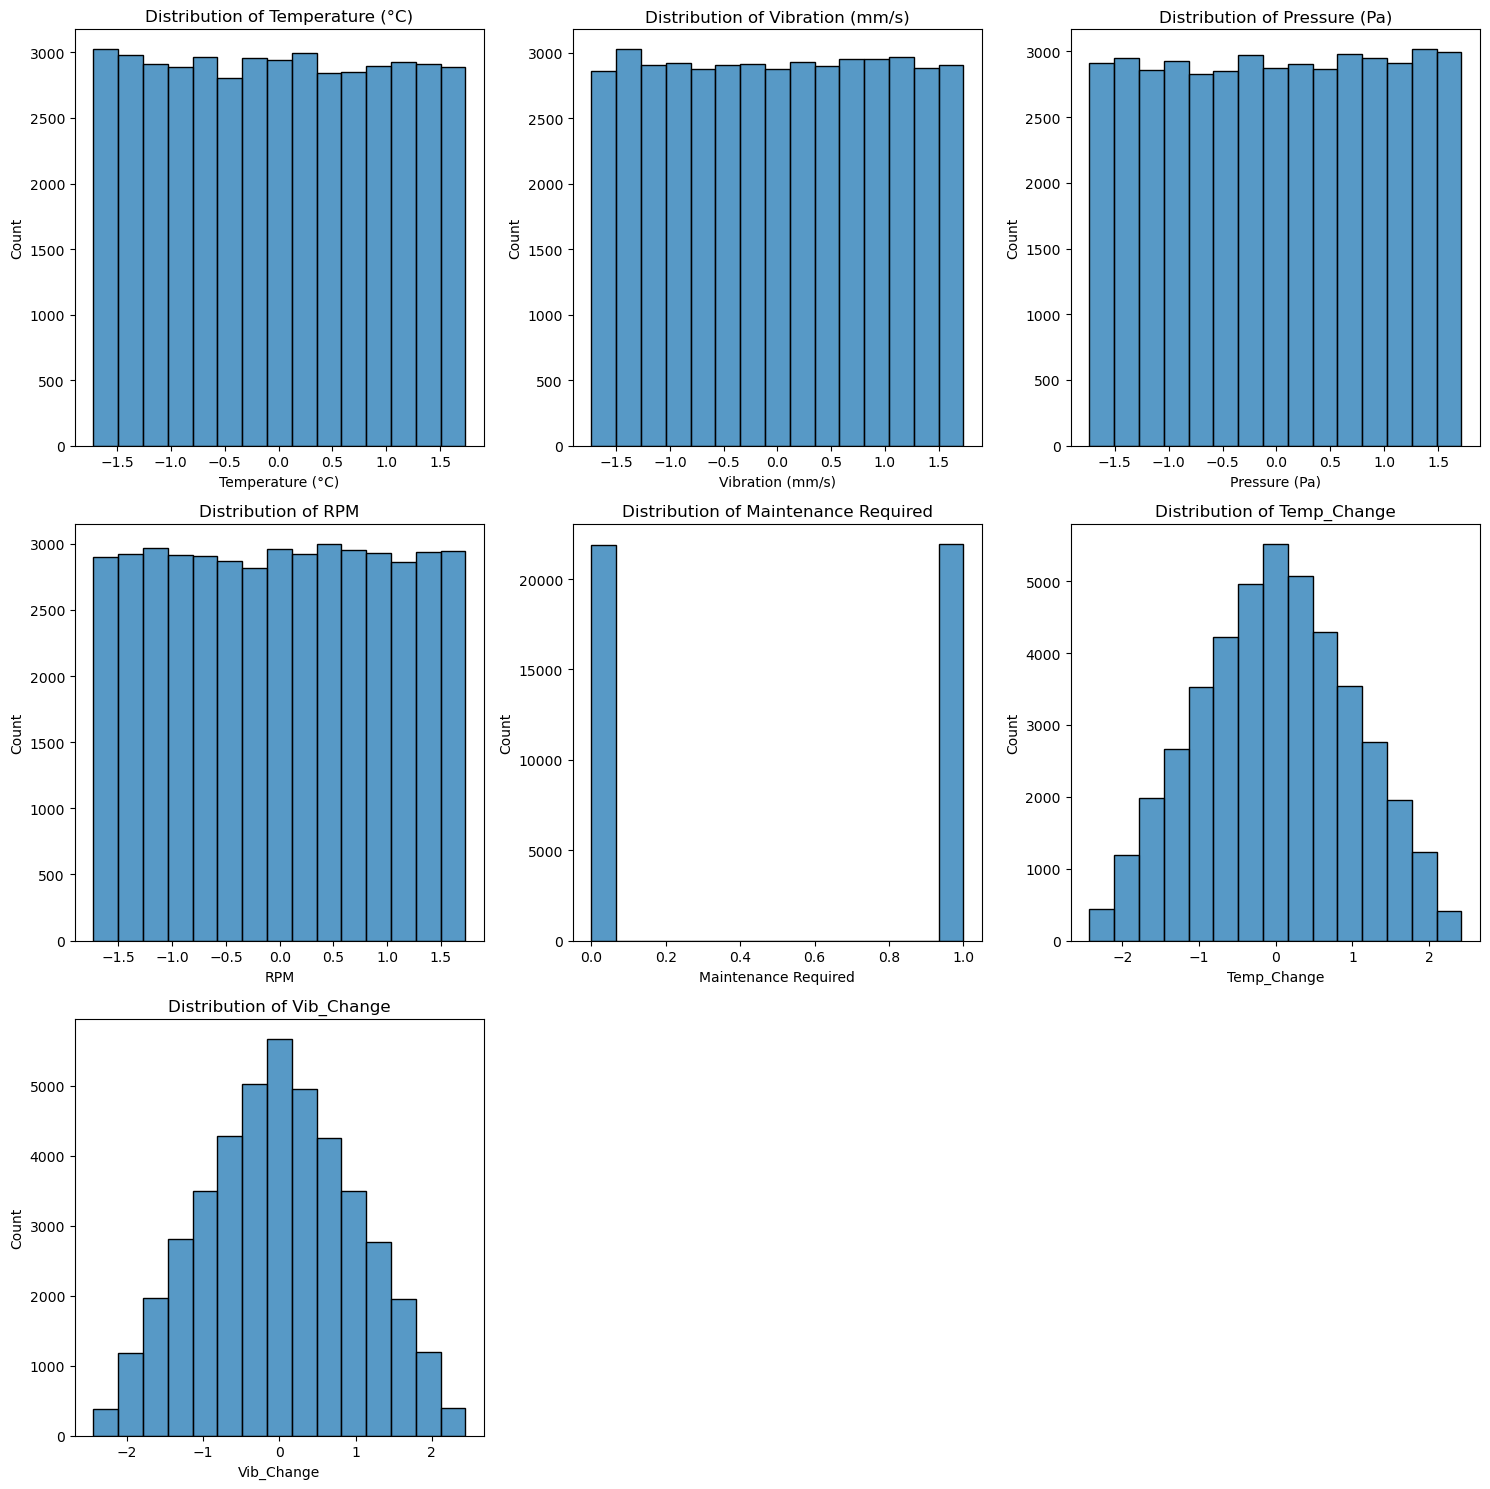

In [280]:
plot_histograms(data_processed,15)

In [288]:
data_processed['Timestamp'] = pd.to_datetime(data_processed['Timestamp'])

In [290]:
data_processed_index = data_processed.set_index('Timestamp')

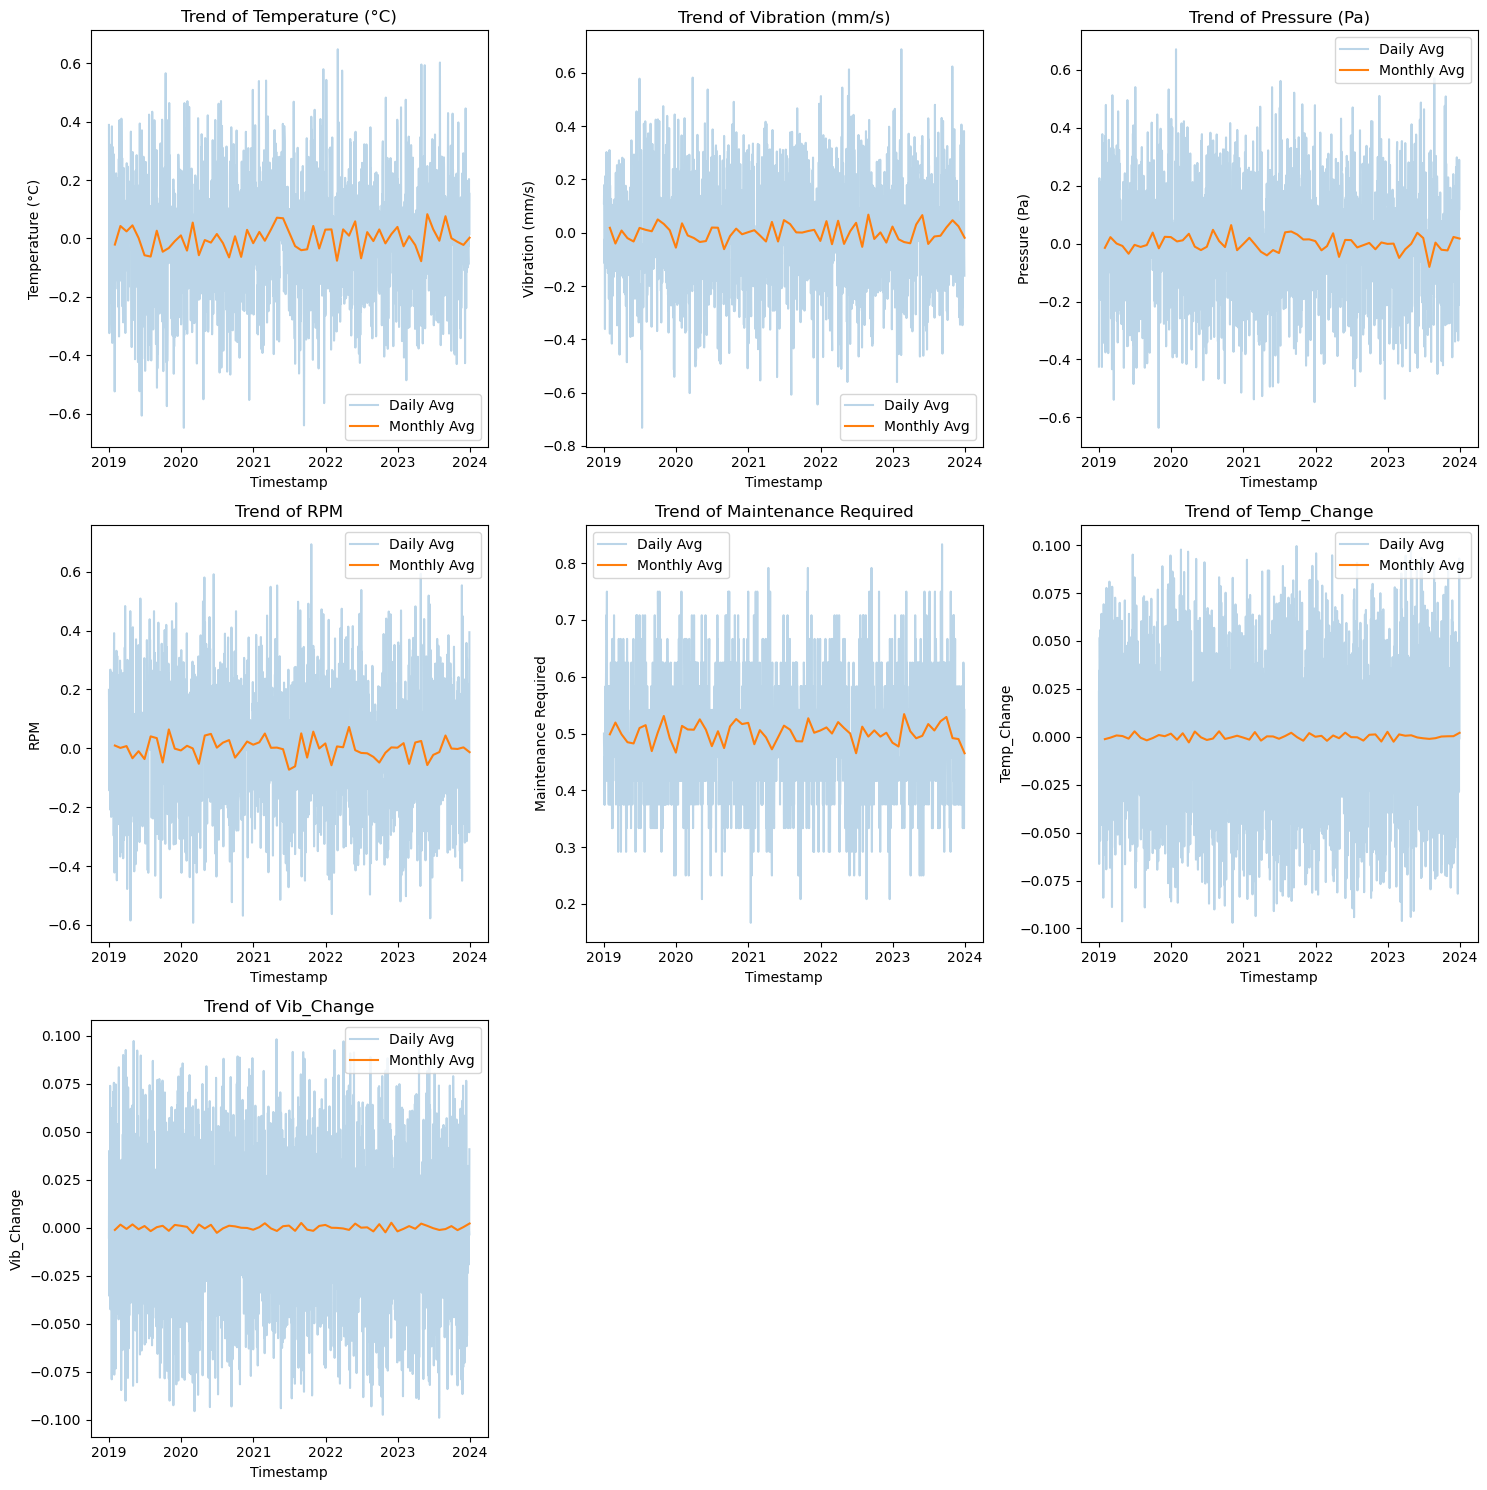

In [292]:
plot_daily_monthly_trends(data_processed_index)

In [294]:
# again it looks so random

In [298]:
X = extract_time_features(data_processed_index)
y = X.pop('Maintenance Required')

In [300]:
X.head(3)

Temperature (°C)  Vibration (mm/s)  Pressure (Pa)  \
Timestamp                                                                
2019-01-01 00:00:00          0.176283          0.033611       0.404079   
2019-01-01 01:00:00          0.750960          0.302949       1.033265   
2019-01-01 02:00:00          0.362631         -0.712681       1.597605   

                          RPM  Temp_Change  Vib_Change  hour  day  weekday  \
Timestamp                                                                    
2019-01-01 00:00:00  0.832177    -0.000021   -0.000016     0    1        1   
2019-01-01 01:00:00 -0.719691     0.406404    0.190254     1    1        1   
2019-01-01 02:00:00  0.428044    -0.274656   -0.717490     2    1        1   

                     month  year  
Timestamp                         
2019-01-01 00:00:00      1  2019  
2019-01-01 01:00:00      1  2019  
2019-01-01 02:00:00      1  2019

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=101)

In [304]:
pipeline.set_params(classifier=LogisticRegression())

Pipeline(steps=[('preprocesser',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('time_features',
                                                  OneHotEncoder(),
                                                  ['hour', 'day', 'weekday',
                                                   'month', 'year'])])),
                ('classifier', LogisticRegression())])

In [306]:
results = calculate_classification_metrics(pipeline,X_train,y_train)
print(results)

(0.4996289954337899, 0.4996246053224529, 0.49962389690671777, 0.49955770652228415)


In [308]:
# same bad !

# Next Dataset

In [311]:
data_processed_features.head()

Timestamp  Temperature (°C)  Vibration (mm/s)  Pressure (Pa)  \
0  2019-01-01 00:00:00          0.176283          0.033611       0.404079   
1  2019-01-01 01:00:00          0.750960          0.302949       1.033265   
2  2019-01-01 02:00:00          0.362631         -0.712681       1.597605   
3  2019-01-01 03:00:00          0.162707         -0.000341       0.058888   
4  2019-01-01 04:00:00         -0.256026         -1.623271      -0.618951   

        RPM  Maintenance Required  Temp_Change  Vib_Change  Temperature_Mean  \
0  0.832177                     1    -0.000021   -0.000016               NaN   
1 -0.719691                     1     0.406404    0.190254               NaN   
2  0.428044                     1    -0.274656   -0.717490               NaN   
3  1.492644                     0    -0.141411    0.503204               NaN   
4  1.035398                     0    -0.296158   -1.146507          0.239311   

   Vibration_Mean  Pressure_Mean  RPM_Mean  
0             NaN            NaN       NaN  
1             NaN            NaN       NaN  
2             NaN            NaN       NaN  
3             NaN            NaN       NaN  
4       -0.399947       0.494977  0.613714

In [313]:
data_processed_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             43800 non-null  object 
 1   Temperature (°C)      43800 non-null  float64
 2   Vibration (mm/s)      43800 non-null  float64
 3   Pressure (Pa)         43800 non-null  float64
 4   RPM                   43800 non-null  float64
 5   Maintenance Required  43800 non-null  int64  
 6   Temp_Change           43800 non-null  float64
 7   Vib_Change            43800 non-null  float64
 8   Temperature_Mean      43796 non-null  float64
 9   Vibration_Mean        43796 non-null  float64
 10  Pressure_Mean         43796 non-null  float64
 11  RPM_Mean              43796 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 4.0+ MB


In [315]:
data_processed_features.dropna(inplace=True)

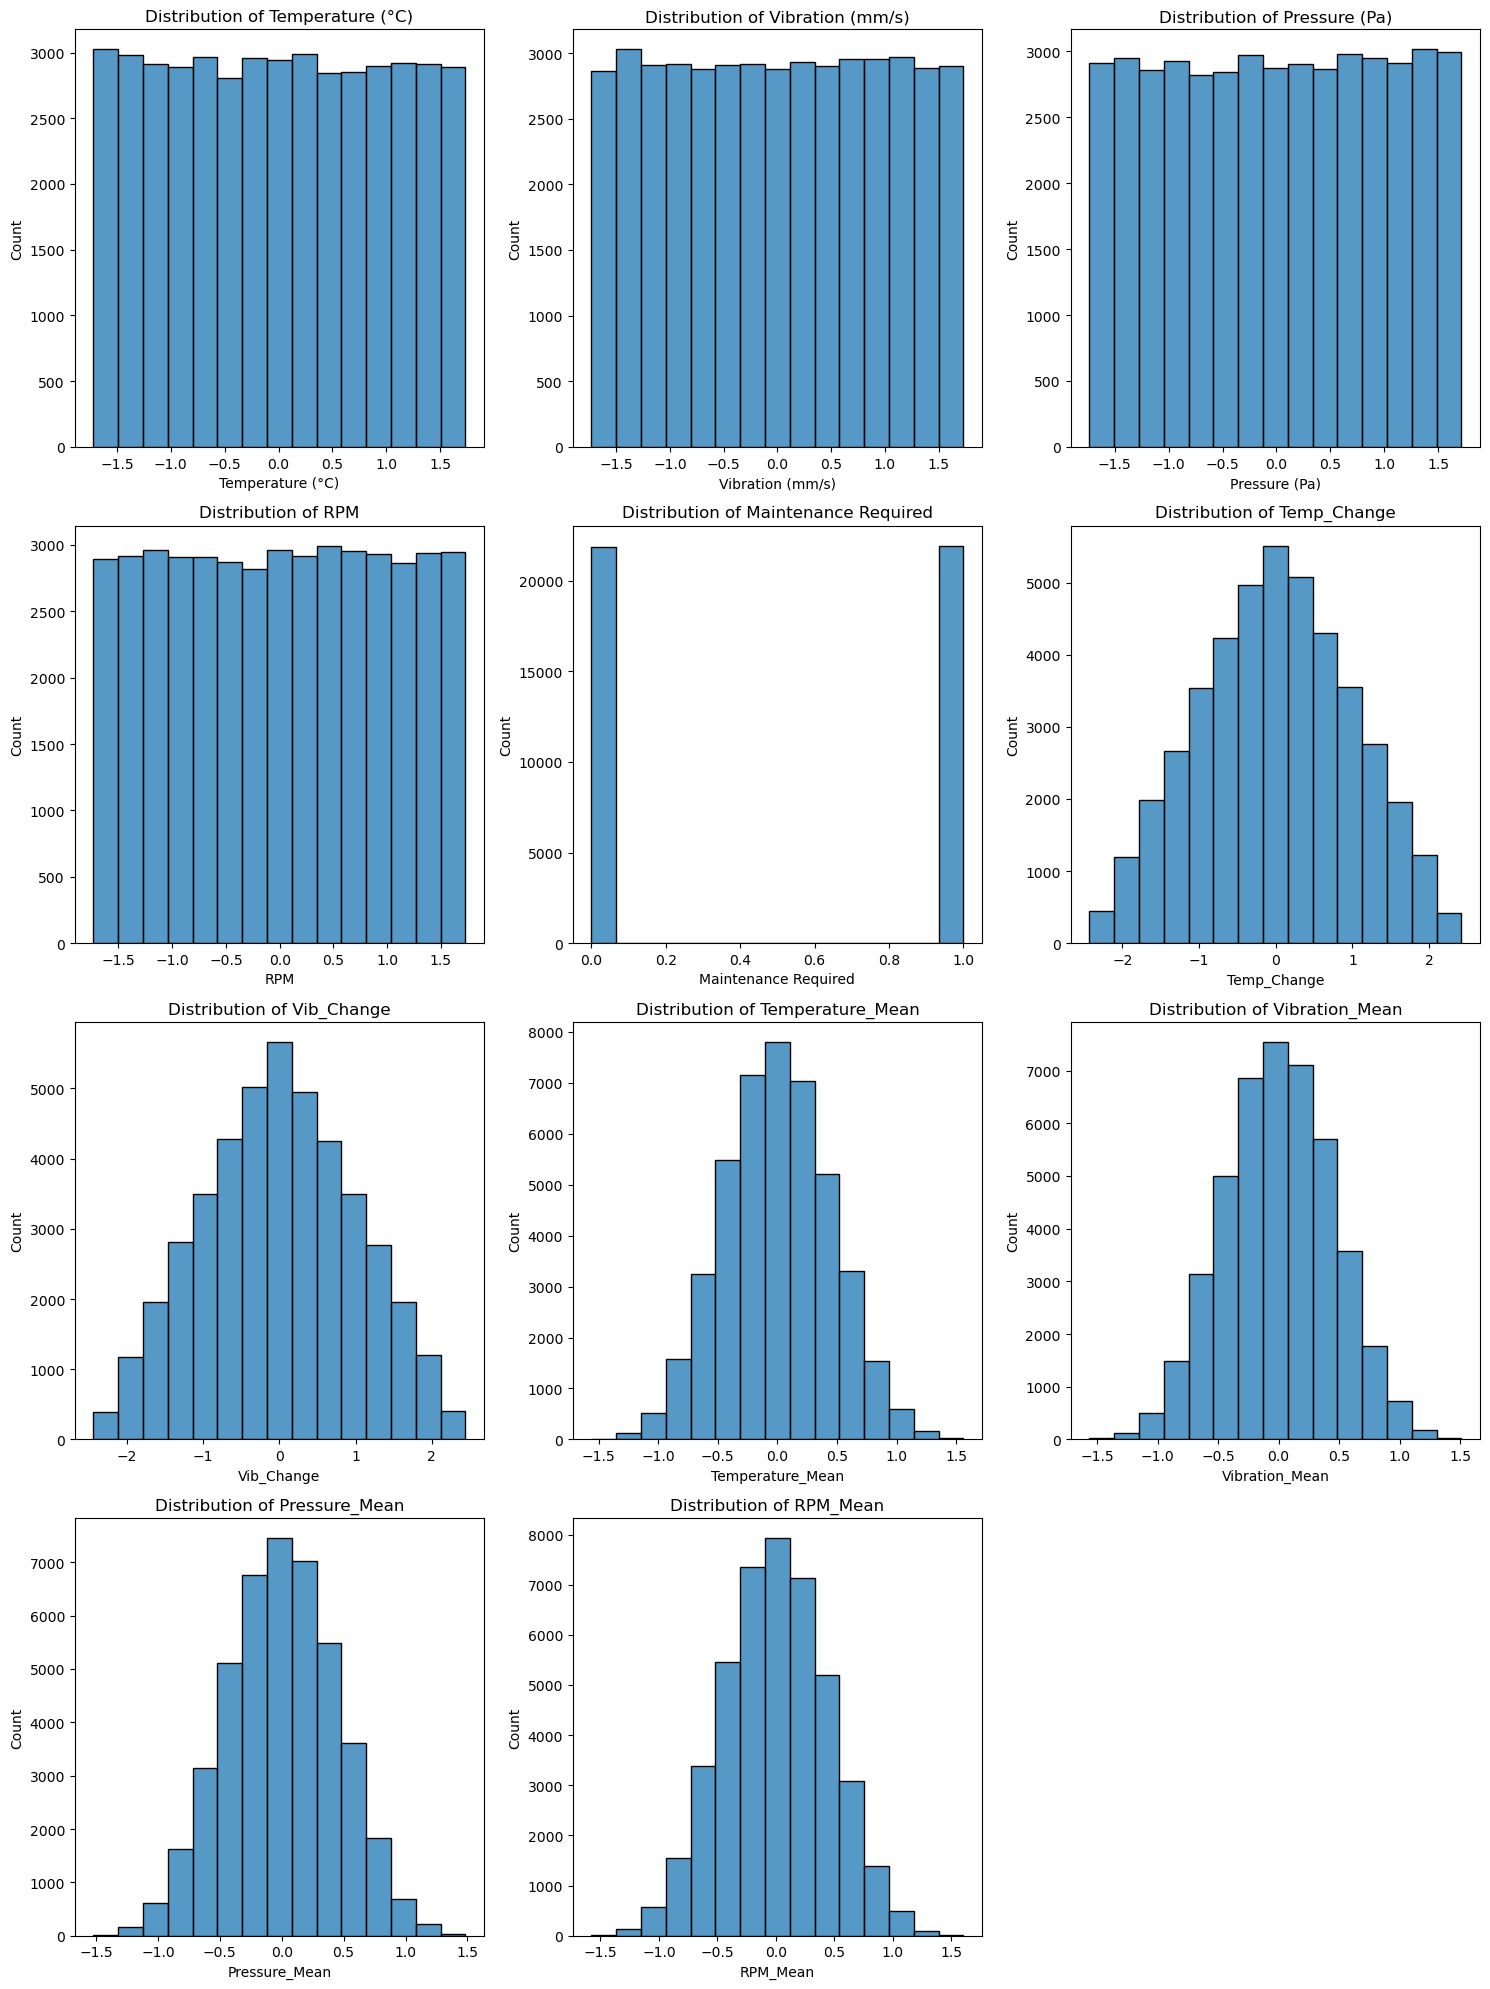

In [317]:
plot_histograms(data_processed_features,15)

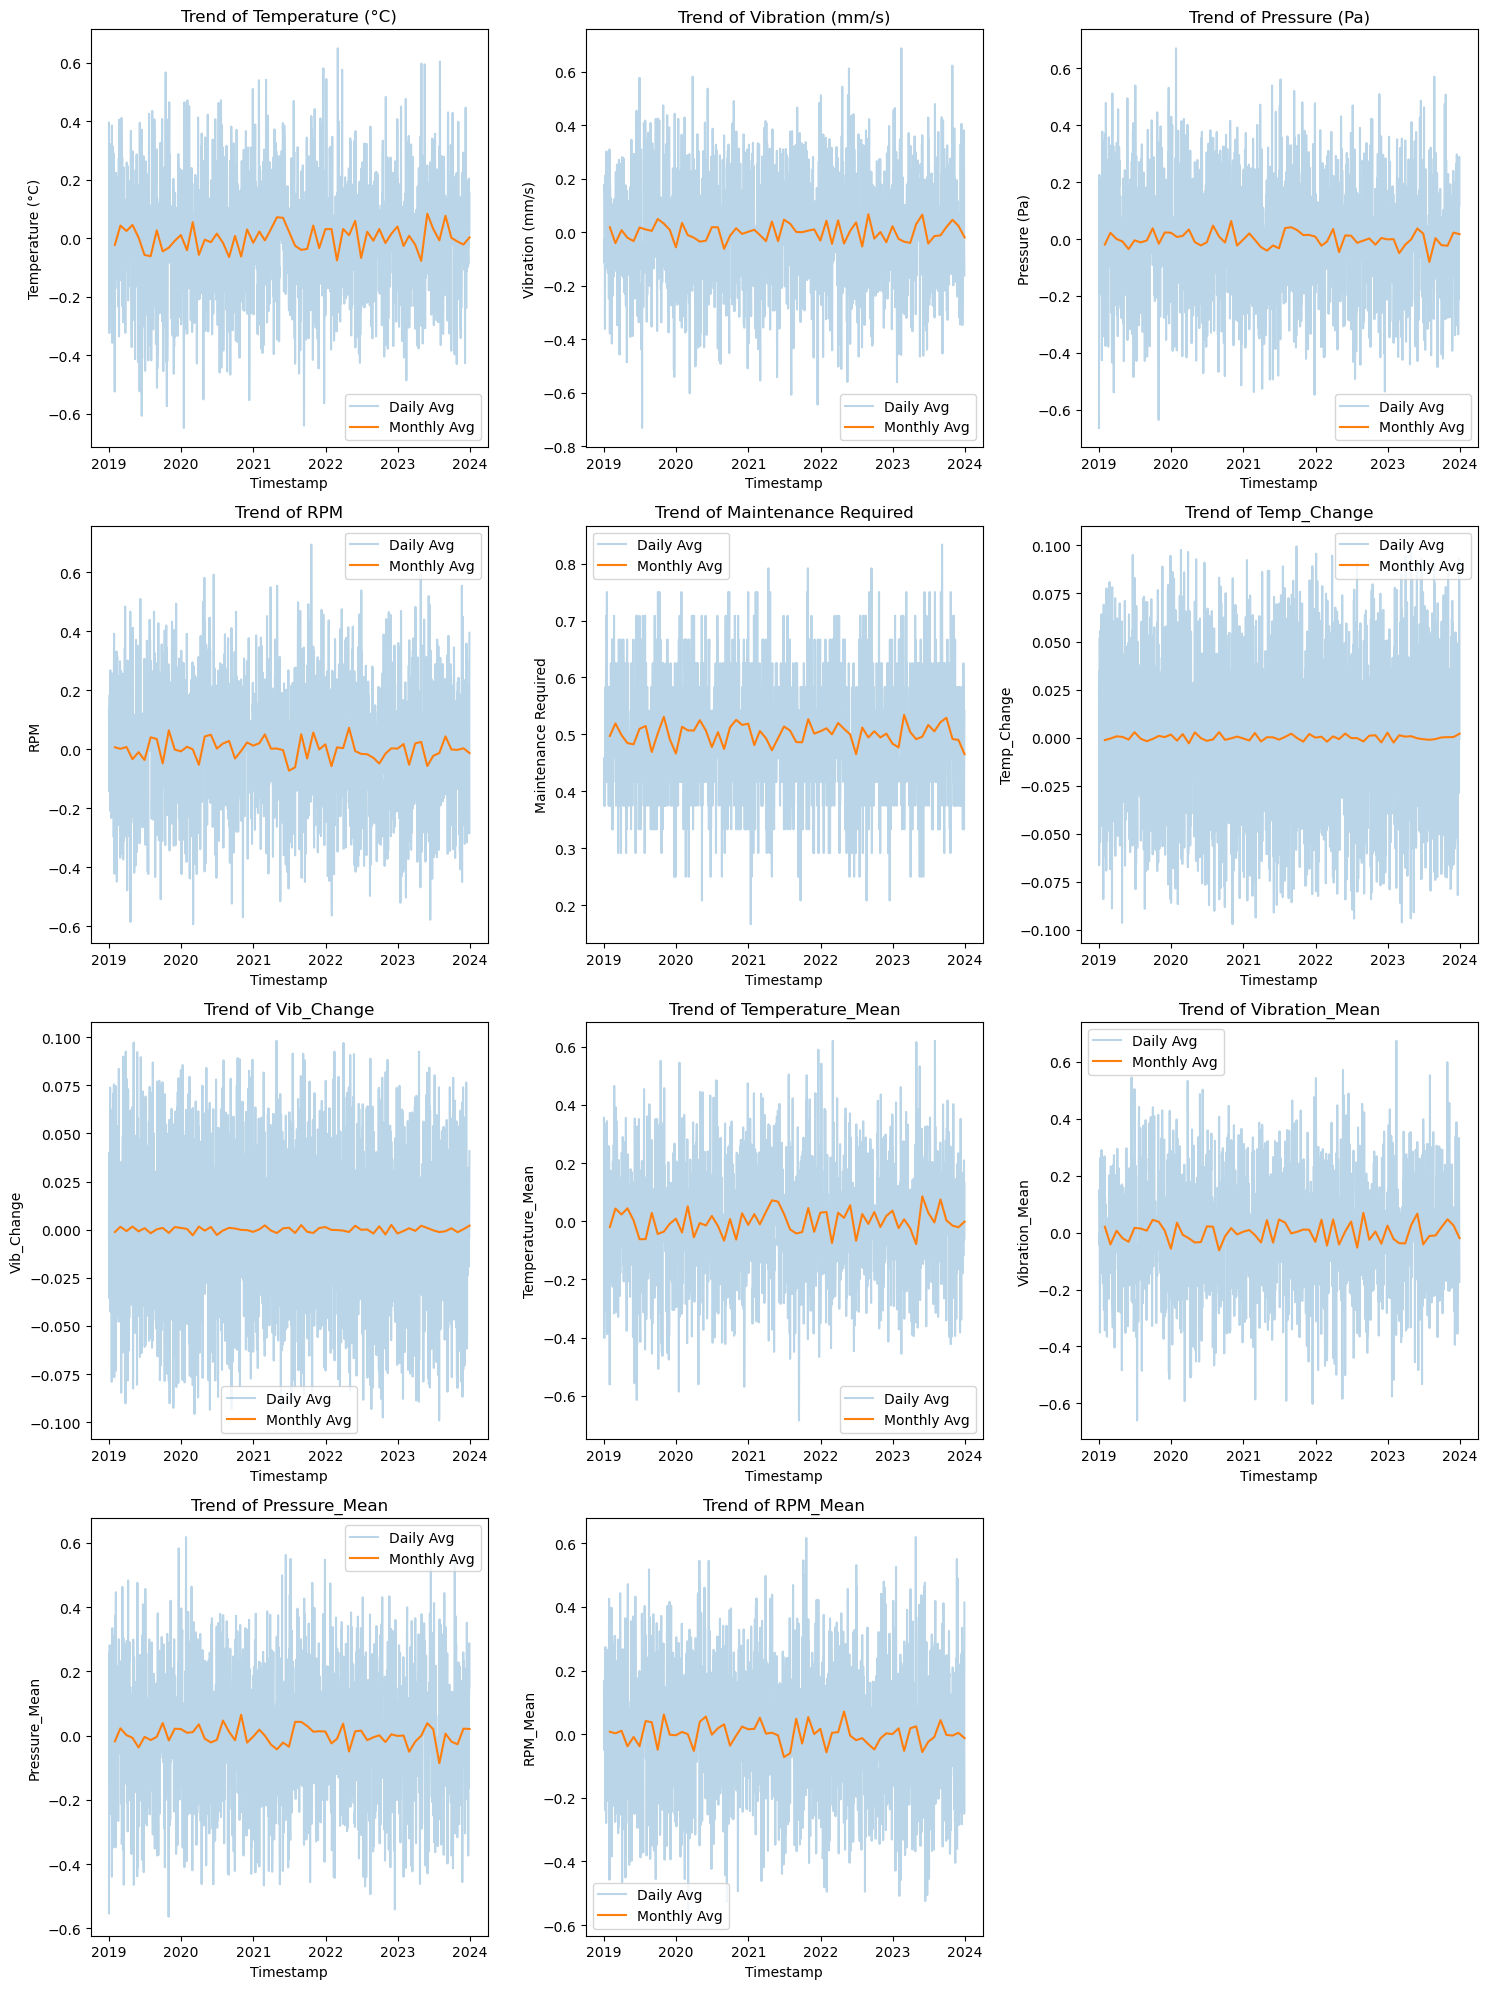

In [319]:
data_processed_features['Timestamp'] = pd.to_datetime(data_processed_features['Timestamp'])
data_processed_features_index = data_processed_features.set_index('Timestamp')
plot_daily_monthly_trends(data_processed_features_index)

<Axes: >

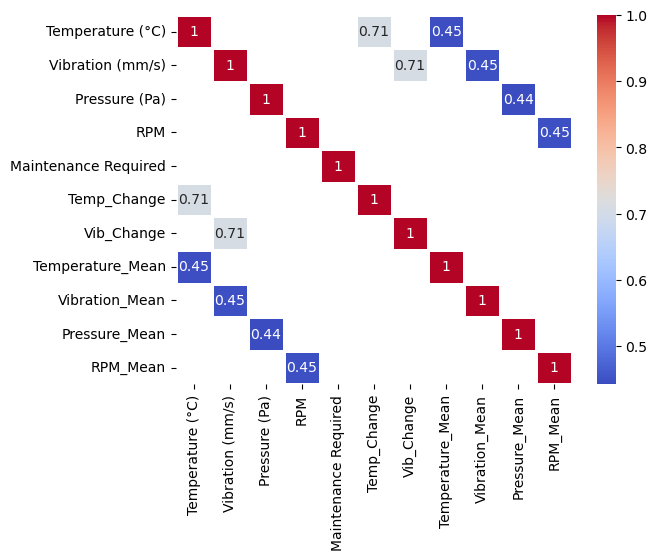

In [329]:
corr_matrix = data_processed_features_index.corr()
sns.heatmap(corr_matrix[corr_matrix >= 0.4],annot=True,linewidths=1,cmap='coolwarm')

In [333]:
X = extract_time_features(data_processed_features_index)
y = X.pop('Maintenance Required')

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=101)

In [337]:
pipeline.set_params(classifier=LogisticRegression())

Pipeline(steps=[('preprocesser',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('time_features',
                                                  OneHotEncoder(),
                                                  ['hour', 'day', 'weekday',
                                                   'month', 'year'])])),
                ('classifier', LogisticRegression())])

In [339]:
results = calculate_classification_metrics(pipeline,X_train,y_train)
print(results)

(0.5032823626145544, 0.5032787836286908, 0.503275888079016, 0.5031931166641166)


# Results:

The data is has no features that can be used for target prediction